In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
# Importing the candlestick formulas 
import plotly.graph_objects as go

In [4]:
#importing the pandas_ta to measure the ADX for volatility 
import pandas_ta as ta 

In [5]:
#sample tickers
tickers = ['BTC-USD', 'ETH-USD','MSFT', 'GOOGL', 'AAPL', 'AMZN', 'META', 'NVDA', 'TSLA']
intervals = []
k_values = [0.3, 0.4, 0.5]
df = dict() #['tickers': df]
# historical_data  = ticker.history(period="7d", interval="1m")  # trying to get only 1m interval for 7period 
rangedf = dict() #to store for the day for open and close price for each day 

In [6]:
for ticker in tickers:
    # df[ticker] = yf.download(ticker, start='2021-01-01', end='2021-12-31')
    rangedf[ticker] = yf.download(ticker, period = "720d", interval = "1d")
    df[ticker] = yf.download(ticker, period = "720d", interval = "1h") #periods scraping 730days and interval with only 1hrs 
    df[ticker] = df[ticker].reset_index()
    rangedf[ticker] = rangedf[ticker].reset_index()
    df[ticker]['Datetime'] = df[ticker]['Datetime'].dt.strftime("%Y-%m-%d")  
    df[ticker].drop(['Adj Close'], axis = 1, inplace = True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [7]:
df['BTC-USD'][['Open', 'High', 'Low', 'Close']] = df['BTC-USD'][['Open', 'High', 'Low', 'Close']].mul(0.01)
rangedf['BTC-USD'][['Open', 'High', 'Low', 'Close']] = rangedf['BTC-USD'][['Open', 'High', 'Low', 'Close']].mul(0.01)

In [8]:
df['BTC-USD']

,Datetime,Open,High,Low,Close,Volume
0,2022-05-21,291.998594,293.024395,291.684766,292.683555,0
1,2022-05-21,292.687695,292.782129,290.273945,291.249648,0
2,2022-05-21,291.262227,292.331992,290.746152,292.048164,0
3,2022-05-21,292.038848,292.423145,291.196777,292.423145,0
4,2022-05-21,292.440605,292.507148,292.089512,292.267773,0
...,...,...,...,...,...,...
17223,2024-05-09,607.962734,611.382656,606.604609,610.545273,556580864
17224,2024-05-09,610.306445,615.143945,610.306445,615.116602,472649728
17225,2024-05-09,614.960117,614.960117,609.162422,611.361914,247199744
17226,2024-05-09,611.560664,614.570195,611.560664,614.503281,206202880


In [9]:
df['MSFT'].ta.adx(high='High', low='Low', close='Close', length=14)

,ADX_14,DMP_14,DMN_14
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
5014,31.907875,25.423440,20.825332
5015,30.144998,24.585131,21.270848
5016,27.991815,23.509114,23.509320
5017,26.483127,21.396934,24.553837


In [10]:

df1 = rangedf['BTC-USD'][:100]
fig = go.Figure(data=[go.Candlestick(x=df1.Date,
                open=df1['Open'],
                high=df1['High'],
                low=df1['Low'],
                close=df1['Close'])])

fig.show()

# 1.Larry William Volatillity Breakout Strategy Formula
<img src="LarryWilliam.png" alt="LarryWilliamFormula" style="width:50%;" />


In [11]:
#making the higher range and lower range for each of the day 
for ticker in tickers:
    row, col = rangedf[ticker].shape
    rangedf[ticker]['Range'] = rangedf[ticker]['High'].shift(1) - rangedf[ticker]['Low'].shift(1)
    for k in k_values:
        # rangedf[ticker] = rangedf[ticker].iloc[1:]
        rangedf[ticker][f'{ticker} Higher Range{str(k)}'] = rangedf[ticker]['Open'] + (rangedf[ticker]['Range'] * k)
        rangedf[ticker][f'{ticker} Lower Range{str(k)}'] = rangedf[ticker]['Open'] - (rangedf[ticker]['Range'] * k)
    rangedf[ticker] = rangedf[ticker].iloc[1:]


In [12]:
df['BTC-USD']

,Datetime,Open,High,Low,Close,Volume
0,2022-05-21,291.998594,293.024395,291.684766,292.683555,0
1,2022-05-21,292.687695,292.782129,290.273945,291.249648,0
2,2022-05-21,291.262227,292.331992,290.746152,292.048164,0
3,2022-05-21,292.038848,292.423145,291.196777,292.423145,0
4,2022-05-21,292.440605,292.507148,292.089512,292.267773,0
...,...,...,...,...,...,...
17223,2024-05-09,607.962734,611.382656,606.604609,610.545273,556580864
17224,2024-05-09,610.306445,615.143945,610.306445,615.116602,472649728
17225,2024-05-09,614.960117,614.960117,609.162422,611.361914,247199744
17226,2024-05-09,611.560664,614.570195,611.560664,614.503281,206202880


In [13]:
#The values you need for LarryWilliams 
#The Range can be calculated by subtracting the values of the daily high from the daily low; Range = High - Low
#Base Price, or Entry Price = Previous Day's Candle Close + (Range * K), with K being a constant of 0.6 to represent the noise ratio.s
def LarryWilliams(ticker, df, k): #df represents one of the ticker's data 
    k_str = str(k)
    # df['Range'] = df['High'].shift(1) - df['Low'].shift(1)
    # df = df.iloc[1:]
    row, col = df.shape
    df[f'{ticker} Lower Range{k_str}'] = [0 for _ in range(row)]
    df[f'{ticker} Higher Range{k_str}'] = [0 for _ in range(row)]
    for idx, row in df.iterrows(): # df here refers to df[ticker] and allocate the higher range and lower range in corresponding dates. 
        try:
            df.at[idx, f'{ticker} Lower Range{k_str}'] =  rangedf[ticker].loc[rangedf[ticker]['Date'] == row['Datetime']][f'{ticker} Lower Range{k_str}'].iloc[0]
            df.at[idx, f'{ticker} Higher Range{k_str}'] =  rangedf[ticker].loc[rangedf[ticker]['Date'] == row['Datetime']][f'{ticker} Higher Range{k_str}'].iloc[0]
        except IndexError:
            pass
    signals = [1 if row['Close'] >= row[f'{ticker} Higher Range{k_str}'] else -1 if row['Close'] <= row[f'{ticker} Lower Range{k_str}'] else 0 for index, row  in df.iterrows()]
    row , col = df.shape #length of rows and columns  
    df[f'{ticker} Signals{k_str}'] = [0 for _ in range(row)] #initialize the signal column with 0
    df[f'{ticker} Signals{k_str}'] =  signals[:]
    # print(signals)
    return df


In [14]:
 #making several constants for comparison
for ticker in tickers: #iterating over the tickers 
    for k in k_values:
        df[ticker] = LarryWilliams(ticker, df[ticker], k)
    df[ticker] = df[ticker].iloc[1:]

# Signals
1: means to take long position <br>
-1: means to take short position<br>
0: means to hold 

# Calculate the return based on different values
- $1$ in dfs means to buy the stock
- $-1$ in dfs means to sell the stock
- $0$ in dfs means to hold<br>
When buying or selling, we are going to assume that close is the current price as yfinance does not offer the current price

In [15]:
#Intializing balance row for each tickers 
for ticker in tickers:
    for k in k_values: #iterating over the tickers
        k_str = str(k)
        df1 =df[ticker]
        row, col = df1.shape
        df1[f'{ticker} Balance{k_str}'] = [0 for _ in range(row)]
        df1[f'{ticker} Position{k_str}'] = [0 for _ in range(row)]
        df1[f'{ticker} Profit{k_str}'] = [0 for _ in range(row)]
#Initializing balance, position, profit for btc/usd 
# for k in k_values: #iterating over the tickers
#     k_str = str(k)
#     row, col = df_btc.shape
#     df_btc[f'Balance{k_str}'] = [0 for _ in range(row)]
#     df_btc[f'Position{k_str}'] = [0 for _ in range(row)]
#     df_btc[f'Profit{k_str}'] = [0 for _ in range(row)]

/var/folders/nf/0vtk3k494119zd0hw585mcqc0000gn/T/ipykernel_78739/1053075304.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nf/0vtk3k494119zd0hw585mcqc0000gn/T/ipykernel_78739/1053075304.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nf/0vtk3k494119zd0hw585mcqc0000gn/T/ipykernel_78739/1053075304.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [16]:
df['BTC-USD']

,Datetime,Open,High,Low,Close,Volume,BTC-USD Lower Range0.3,BTC-USD Higher Range0.3,BTC-USD Signals0.3,BTC-USD Lower Range0.4,...,BTC-USD Signals0.5,BTC-USD Balance0.3,BTC-USD Position0.3,BTC-USD Profit0.3,BTC-USD Balance0.4,BTC-USD Position0.4,BTC-USD Profit0.4,BTC-USD Balance0.5,BTC-USD Position0.5,BTC-USD Profit0.5
1,2022-05-21,292.687695,292.782129,290.273945,291.249648,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
2,2022-05-21,291.262227,292.331992,290.746152,292.048164,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
3,2022-05-21,292.038848,292.423145,291.196777,292.423145,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
4,2022-05-21,292.440605,292.507148,292.089512,292.267773,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
5,2022-05-21,292.311641,292.769629,292.125059,292.551465,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17223,2024-05-09,607.962734,611.382656,606.604609,610.545273,556580864,605.385199,618.038941,0,603.276242,...,0,0,0,0,0,0,0,0,0,0
17224,2024-05-09,610.306445,615.143945,610.306445,615.116602,472649728,605.385199,618.038941,0,603.276242,...,0,0,0,0,0,0,0,0,0,0
17225,2024-05-09,614.960117,614.960117,609.162422,611.361914,247199744,605.385199,618.038941,0,603.276242,...,0,0,0,0,0,0,0,0,0,0
17226,2024-05-09,611.560664,614.570195,611.560664,614.503281,206202880,605.385199,618.038941,0,603.276242,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#making the positions for each tickers and also its return  
#as in we don't have the data for current price, we assume that just buying one stocks per day depending on positions 
# this one is for magnficient 7 
#we assume that our balance starts with $10,000 USD 
def calculate_return(df, k):
    k_str = str(k)
    for ticker in tickers: #traversing through each tickers 
        rows, cols = df[ticker].shape #checkin the shape for each df 
        # row['return'] = [0 for _ in range(rows)] #intialize the tickers columns for Return 
        balance = 10000 #intial capital, account
        position = 0
        profit = 10000
        for index, row in df[ticker].iterrows(): # row = df[ticker], iterate over each tick
            current_price = (row['High'] + row['Low']) / 2  #made up a current_price 
            # if index == 0:
            #     continue #skip the first row
            if row[f'{ticker} Signals{k_str}'] == 1 and balance >= current_price: #signals = 1 indicates buy
                balance -= current_price  #Close here refers to 
                position += 1 
            elif row[f'{ticker} Signals{k_str}'] == -1 and position > 0: #signals = -1 indicates sell
                balance += current_price
                position -= 1 
            else: # hold 
                pass
            profit = balance + (position * current_price)
            df[ticker].at[index, f'{ticker} Profit{k_str}'] = profit
            df[ticker].at[index, f'{ticker} Balance{k_str}'] = balance
            df[ticker].at[index, f'{ticker} Position{k_str}'] = position

In [18]:
for k in k_values:
    calculate_return(df, k)

In [19]:
df['BTC-USD'][f'BTC-USD Profit0.5']

1        10000.000000
2        10000.011035
3        10000.552812
4        10002.017920
5        10002.613975
             ...     
17223    16434.083228
17224    16463.935728
17225    16458.624321
17226    16466.657603
17227    16498.560103
Name: BTC-USD Profit0.5, Length: 17227, dtype: float64

# Plotting the grpah 
- For each K values 
- Profit vs Date graph 

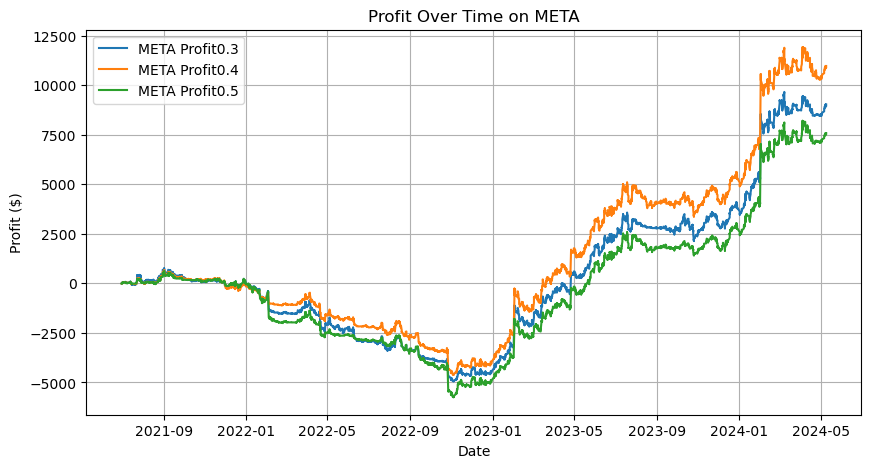

In [82]:
plt.figure(figsize=(10, 5))
# for ticker in tickers:
ticker = 'META' #insert any tickers you are curious about
for k in k_values:
    k_str = str(k)
    df[ticker]['Datetime'] = pd.to_datetime(df[ticker]['Datetime'])
    plt.plot(df[ticker]['Datetime'], df[ticker][f'{ticker} Profit{k_str}'].sub(10000), label = f'{ticker} Profit{k_str}')
plt.title(f'Profit Over Time on {ticker}')  # Set the title of the graph
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Profit ($)')  # Set the y-axis label
plt.grid(True)  # Optional: Adds a grid for easier reading
plt.legend(loc='best')
plt.show()

In [80]:
df['GOOGL']['Current_Price'] = (df['GOOGL']['High'] + df['GOOGL']['Low']) / 2 

In [81]:
df['GOOGL']

,Datetime,Open,High,Low,Close,Volume,GOOGL Lower Range0.3,GOOGL Higher Range0.3,GOOGL Signals0.3,GOOGL Lower Range0.4,...,GOOGL Balance0.3,GOOGL Position0.3,GOOGL Profit0.3,GOOGL Balance0.4,GOOGL Position0.4,GOOGL Profit0.4,GOOGL Balance0.5,GOOGL Position0.5,GOOGL Profit0.5,Current_Price
1,2021-06-30,121.609497,121.821999,121.392944,121.430008,140494,0.000000,0.000000,1,0.000000,...,9878.392529,1,10000.000000,9878.392529,1,10000.000000,9878.392529,1,10000.000000,121.607471
2,2021-06-30,121.449501,121.964005,121.354507,121.797501,112841,0.000000,0.000000,1,0.000000,...,9756.733273,2,10000.051785,9756.733273,2,10000.051785,9756.733273,2,10000.051785,121.659256
3,2021-06-30,121.797997,121.921249,121.671249,121.698502,67549,0.000000,0.000000,1,0.000000,...,9634.937023,3,10000.325771,9634.937023,3,10000.325771,9634.937023,3,10000.325771,121.796249
4,2021-06-30,121.700500,121.850998,121.568008,121.683998,62509,0.000000,0.000000,1,0.000000,...,9513.227520,4,10000.065533,9513.227520,4,10000.065533,9513.227520,4,10000.065533,121.709503
5,2021-06-30,121.704506,121.938004,121.688004,121.891006,90642,0.000000,0.000000,1,0.000000,...,9391.414516,5,10000.479534,9391.414516,5,10000.479534,9391.414516,5,10000.479534,121.813004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,2024-05-08,169.300095,169.904999,169.279999,169.630005,1050627,167.989001,170.010999,0,167.652002,...,1928.128445,66,13121.233364,889.431240,77,13948.053646,412.320396,79,13810.127800,169.592499
5015,2024-05-08,169.630005,169.860001,169.544998,169.660004,1127742,167.989001,170.010999,0,167.652002,...,1928.128445,66,13128.493404,889.431240,77,13956.523693,412.320396,79,13818.817848,169.702499
5016,2024-05-08,169.660004,169.807800,169.270004,169.350006,1840275,167.989001,170.010999,0,167.652002,...,1928.128445,66,13117.695995,889.431240,77,13943.926716,412.320396,79,13805.893677,169.538902
5017,2024-05-09,169.559998,170.690002,168.179993,168.429993,3917398,169.137001,169.982994,-1,168.996002,...,2097.563442,65,13110.838284,1058.866238,76,13935.926052,581.755394,78,13797.685204,169.434998
